In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)
library("ggplot2")# note that Seurat v3, they return ggplot object for easy customization
library(parallel)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
Esr1KOF.data <-Read10X(data.dir = "/media/garret/New Volume/scRNAseq_data/backupv3/v3/Esr1KO_F/30-413463513/01_analysis/cellranger_count/P50F-Esr1KO/raw_feature_bc_matrix")
colnames(Esr1KOF.data) = paste0(colnames(Esr1KOF.data),"Esr1KOF")
Esr1KOF<- CreateSeuratObject(counts = Esr1KOF.data, min.cells = 3, min.features = 200, project = "10X_MPOA")
Neuron_id<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/all_cells/Neuron_bid.rds")
Esr1KOF<-subset(x = Esr1KOF, cells=Neuron_id)
Esr1KOF@meta.data$stim <- "Esr1KOF"

In [3]:
#for paper neuron:

In [4]:
length(Neuron_id)

[1] 2182

Centering and scaling data matrix

Warning message:
“Removed 28894 rows containing missing values (geom_point).”


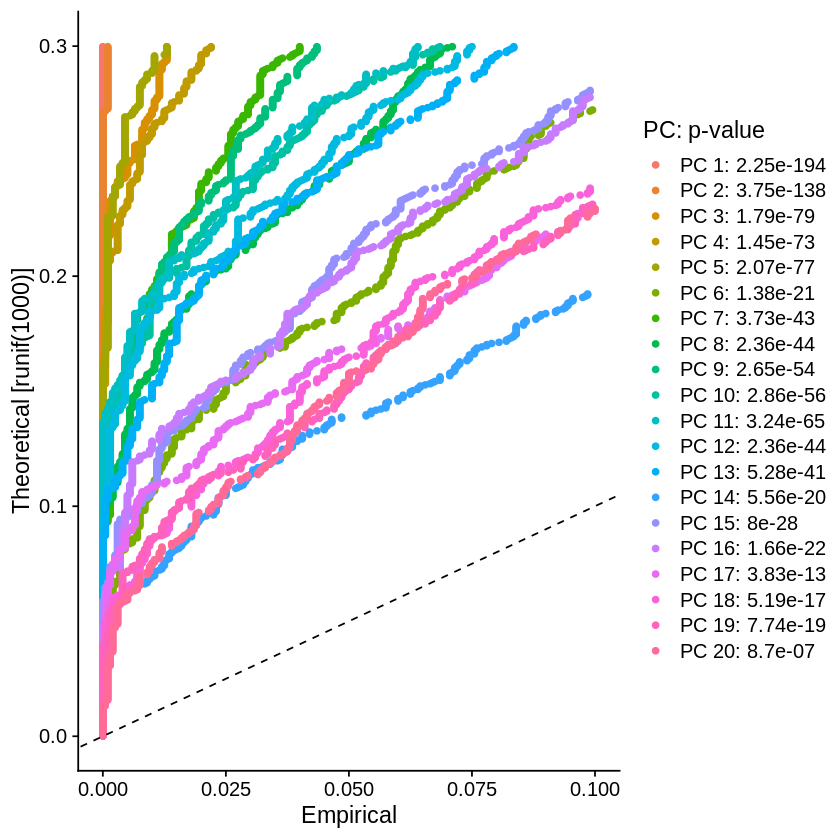

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2182
Number of edges: 84785

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8265
Number of communities: 16
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:00:55 UMAP embedding parameters a = 0.9922 b = 1.112

16:00:55 Read 2182 rows and found 30 numeric columns

16:00:55 Using Annoy for neighbor search, n_neighbors = 30

16:00:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:00:55 Writing NN index file to temp file /tmp/RtmpiVEKk5/file35541cda1087

16:00:55 Searching Annoy index using 1 thread, search_k = 3000

16:00:56 Annoy recall = 100%

16:00:56 Commencing smooth kNN distance calibration using 1 thread

16:00:56 Initializing fro

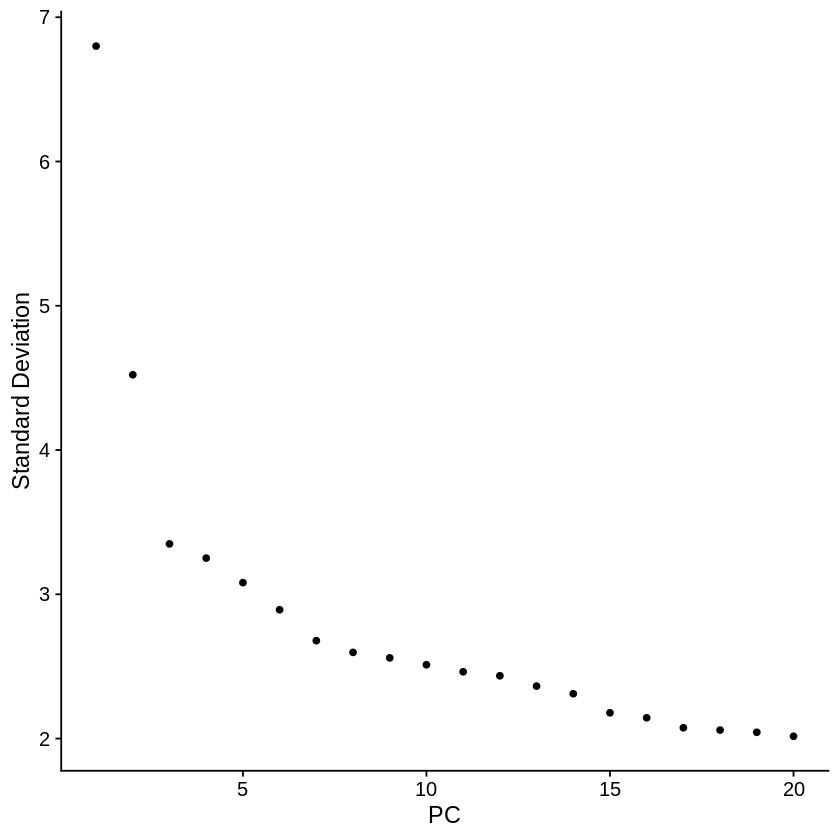

In [4]:
Esr1KOF<- NormalizeData(object = Esr1KOF,verbose = FALSE) 
Esr1KOF<- FindVariableFeatures(object =Esr1KOF,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
Esr1KOF<- ScaleData(object = Esr1KOF, features = rownames(x =Esr1KOF))
Esr1KOF<- RunPCA(object = Esr1KOF, features = VariableFeatures(object =Esr1KOF), verbose = FALSE)
Esr1KOF <- JackStraw(object =Esr1KOF, num.replicate = 100)
Esr1KOF <- ScoreJackStraw(object = Esr1KOF, dims = 1:20)
JackStrawPlot(object = Esr1KOF, dims = 1:20)
ElbowPlot(object =Esr1KOF)
Esr1KOF <- FindNeighbors(object =Esr1KOF, dims = 1:30)
Esr1KOF <- FindClusters(object = Esr1KOF, resolution = 0.8)
Esr1KOF<- RunUMAP(object = Esr1KOF, reduction = "pca", dims = 1:30)


Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


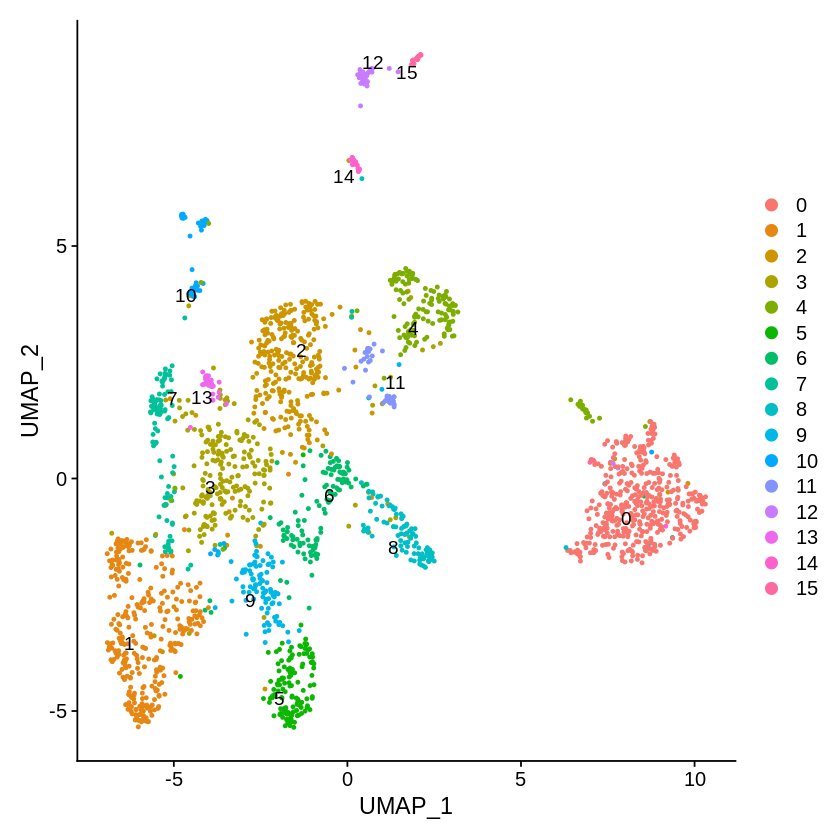

In [5]:
DimPlot(object = Esr1KOF, reduction = "umap", label = TRUE, repel = TRUE) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/umap_number.pdf",width=10,height=10)

In [7]:
DefaultAssay(Esr1KOF) <- "RNA"

In [13]:
saveRDS(Esr1KOF,file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/Esr1KOF.rds")

In [16]:
Esr1KOF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/Esr1KOF.rds")
new.ident <- c("Mix1","Vgat1","Vgat2","Vgat3","Vglu1","Vglu2","Mix2","Vgat4","Vgat5","Vglu3","Mix3","Vglu4","Vglu5","Vgat6","Vglu6","Vglu7")
names(x = new.ident) <- levels(x =Esr1KOF)
Esr1KOF<- RenameIdents(object =Esr1KOF, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOF@assays$RNA@data[,which(Idents(object=Esr1KOF) %in% new.ident[i])]))}

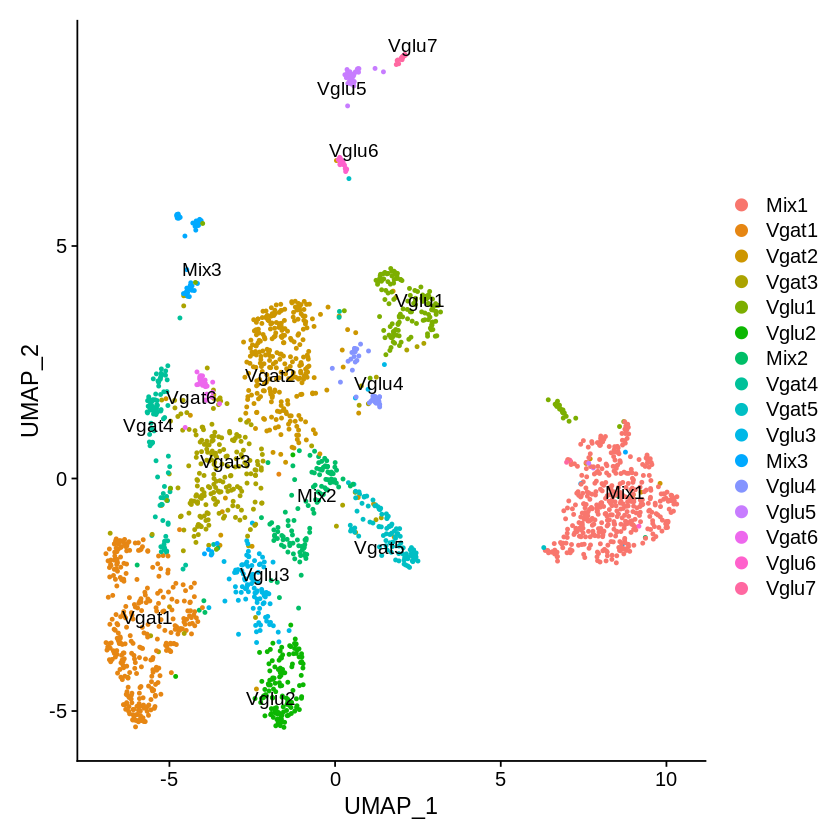

In [17]:
DimPlot(object = Esr1KOF, reduction = "umap", label = TRUE, repel = TRUE) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/umap_name.pdf",width=10,height=10)

In [ ]:
violin/disc

In [3]:
Esr1KOF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/Esr1KOF.rds")
new.ident <- c("eMix1","eVgat1","eVgat2","eVgat3","eVglu1","eVglu2","Mix2","eVgat4","eVgat5","eVglu3","Mix3","eVglu4","eVglu5","eVgat6","eVglu6","eVglu7")
names(x = new.ident) <- levels(x =Esr1KOF)
Esr1KOF<- RenameIdents(object =Esr1KOF, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOF@assays$RNA@data[,which(Idents(object=Esr1KOF) %in% new.ident[i])]))}

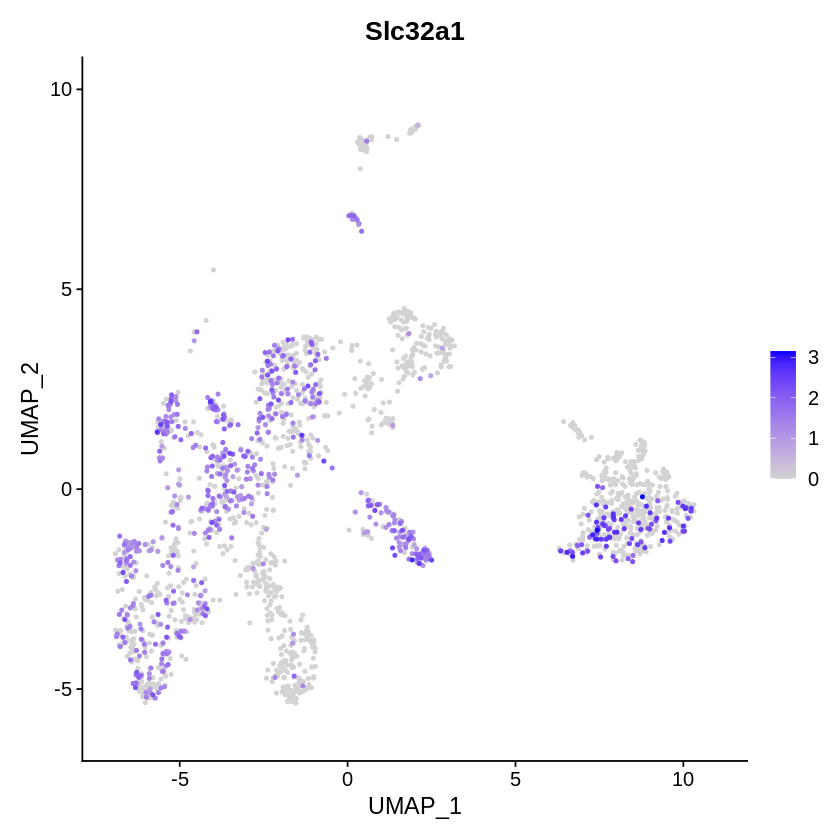

In [5]:
FeaturePlot(object =Esr1KOF, features = c("Slc32a1"),order=TRUE)
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/disc_Esr1KOF_all_#rev3_com#feature_Vgat.pdf",width=10,height=10)

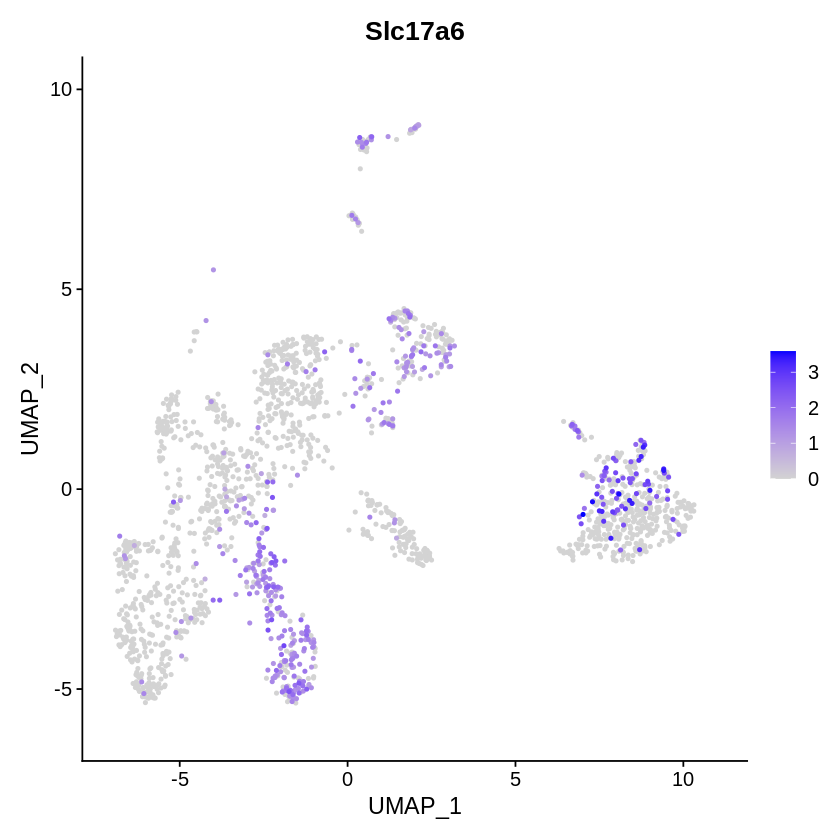

In [6]:
FeaturePlot(object =Esr1KOF, features = c("Slc17a6"),order=TRUE)
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/disc_Esr1KOF_all_#rev3_com#feature_Vglu.pdf",width=10,height=10)

In [3]:
# UMI, gene, fraction, UMAP

In [4]:
Esr1KOF@meta.data$celltype<-Idents(Esr1KOF)
Celltype<-c("eVgat1","eVgat2","eVgat3","eVgat4","eVgat5","eVgat6","eVglu1","eVglu2","eVglu3","eVglu4","eVglu5","eVglu6","eVglu7","eMix1")
Esr1KOF<-subset(Esr1KOF,cells=rownames(Esr1KOF@meta.data)[Esr1KOF@meta.data$celltype %in% Celltype])
Esr1KOF@meta.data$celltype<-factor(Esr1KOF@meta.data$celltype,levels=Celltype)
Idents(Esr1KOF)<-factor(Idents(Esr1KOF),levels=Celltype)

In [6]:
colors<-color<-c("lightblue","lightskyblue","skyblue","deepskyblue","lightsteelblue",
         "dodgerblue","lightsalmon","salmon","darksalmon","lightcoral","indianred",
         "#DC143C","firebrick","darkgray")

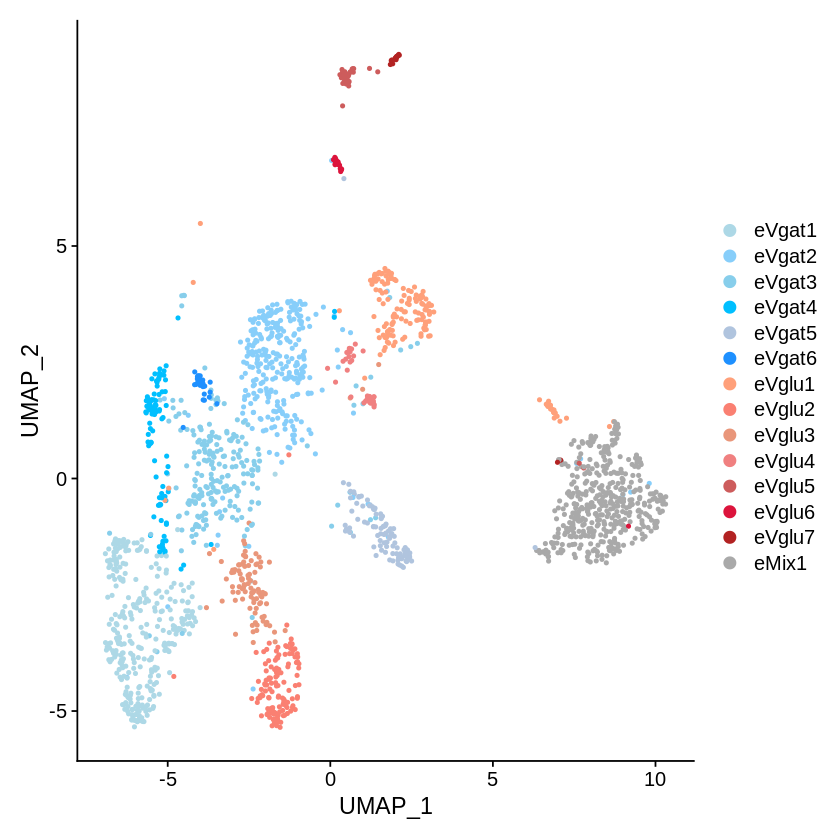

In [8]:
#UMAP
DimPlot(object = Esr1KOF, reduction = "umap", label = FALSE, repel = TRUE,cols=color) 
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOF_neuron_umap_name_rec#3com#4.pdf",width=10,height=10)

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


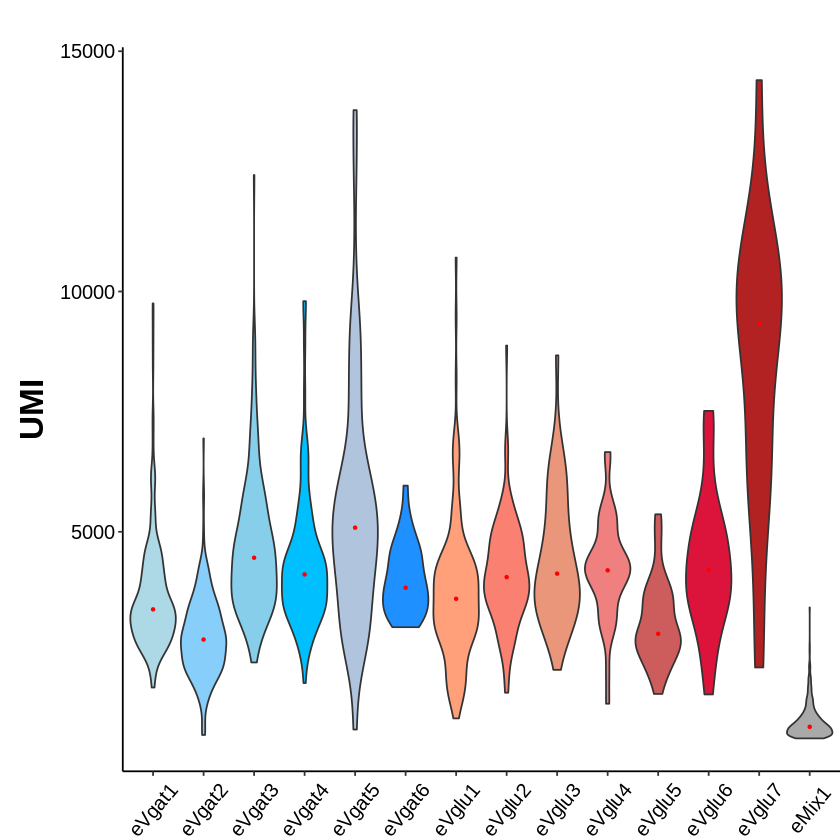

In [9]:
#UMI
ggplot(Esr1KOF@meta.data,aes_string(x="celltype",y="nCount_RNA",fill="celltype"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=0.6, color="red")+ylab("UMI")+ 
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=12,color="black"),axis.title.y=element_text(size=20,angle=90,color="black",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.text.x=element_text(size=12,h=0.5,v=0.5,angle=50,color="black")
,axis.title=element_text(size=15,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(1, 0,0, 0), "cm"))
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOF_UMI_neuroncelltype_rev#3com4.pdf",height=2, width=10 , paper = "letter")

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


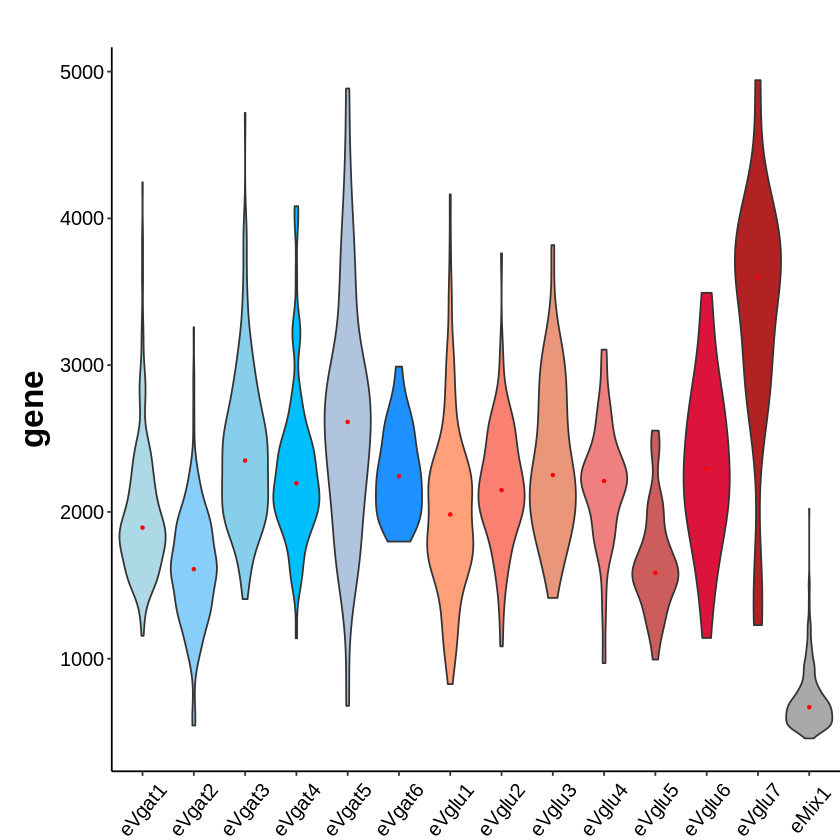

In [10]:
#gene
ggplot(Esr1KOF@meta.data,aes_string(x="celltype",y="nFeature_RNA",fill="celltype"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=0.6, color="red")+ylab("gene")+ 
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=12,color="black"),axis.title.y=element_text(size=20,angle=90,color="black",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.text.x=element_text(size=12,h=0.5,v=0.5,angle=50,color="black")
,axis.title=element_text(size=15,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(1, 0,0, 0), "cm"))
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOF_gene_neuroncelltype_rev#3com4.pdf",height=2, width=10 , paper = "letter")

In [11]:
#fraction
Cell_type<-Celltype
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =Cell_type)
Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-dim(subset(Esr1KOF@meta.data,celltype==Cell_number$type[i]))[1]}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){proportion[i]<-100*Cell_number$len[i]/sum(Cell_number$len)}
Cell_number$prop<-proportion

Cell_number$type<-factor(Cell_number$type,levels=Celltype)

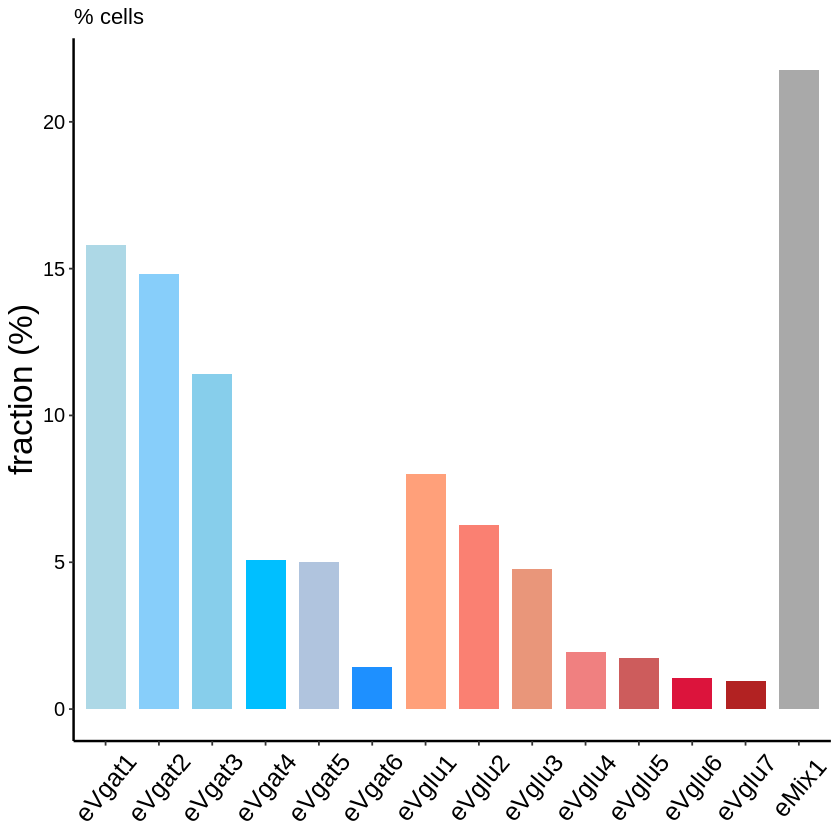

In [12]:
# proportion of cells
ggplot(Cell_number,aes(x=type,y=proportion,fill=type, width=.75))+geom_bar(stat = "identity",position=position_dodge())+ylab("fraction (%)")+
scale_fill_manual(values=colors)+scale_x_discrete(limits = (levels(Cell_number$type)))+
theme(legend.position="none",axis.title.x=element_text(size=0),axis.title.y=element_text(size=20,color="black"),axis.text.y=element_text(size=12,color="black"),axis.text.x=element_text(size=15,angle = 50, hjust =0.5,v=0.5,color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=0.7))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOF_neuroncelltypefraction_rev#3com4.pdf",height=6, width=10 , paper = "letter")

In [25]:
Cell_type<-factor(rev(c("eVgat1","eVgat3","eVgat4","eVgat2","eVgat5","eVgat6")),levels=rev(c("eVgat1","eVgat3","eVgat4","eVgat2","eVgat5","eVgat6")))
gene_list<-c("Slc32a1","Ar","Esr1","Dlx1")

In [37]:
#ext fig7
Cell_type<-factor(rev(c("eVgat1","eVgat3","eVgat4","eVgat2","eVgat5","eVgat6")),levels=rev(c("eVgat1","eVgat3","eVgat4","eVgat2","eVgat5","eVgat6")))
gene_list<-c("Slc32a1","Slc17a6","Ar","Esr1")

In [82]:
Cell_type<-factor(rev(c("eVglu1","eVglu2","eVglu3","eVglu4","eVglu5","eVglu6","eVglu7")),levels=rev(c("eVglu1","eVglu2","eVglu3","eVglu4","eVglu5","eVglu6","eVglu7")))
gene_list<-c("Slc32a1","Slc17a6","Ar","Esr1")

In [38]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=c(rep(gene_list[i],L)))
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(Esr1KOF@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(Esr1KOF@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(Esr1KOF@assays$RNA@data[gene_list[i],]))/sd(Esr1KOF@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] eVgat6 eVgat5 eVgat2 eVgat4 eVgat3 eVgat1 eVgat6 eVgat5 eVgat2 eVgat4
[11] eVgat3 eVgat1 eVgat6 eVgat5 eVgat2 eVgat4 eVgat3 eVgat1 eVgat6 eVgat5
[21] eVgat2 eVgat4 eVgat3 eVgat1
Levels: eVgat6 eVgat5 eVgat2 eVgat4 eVgat3 eVgat1

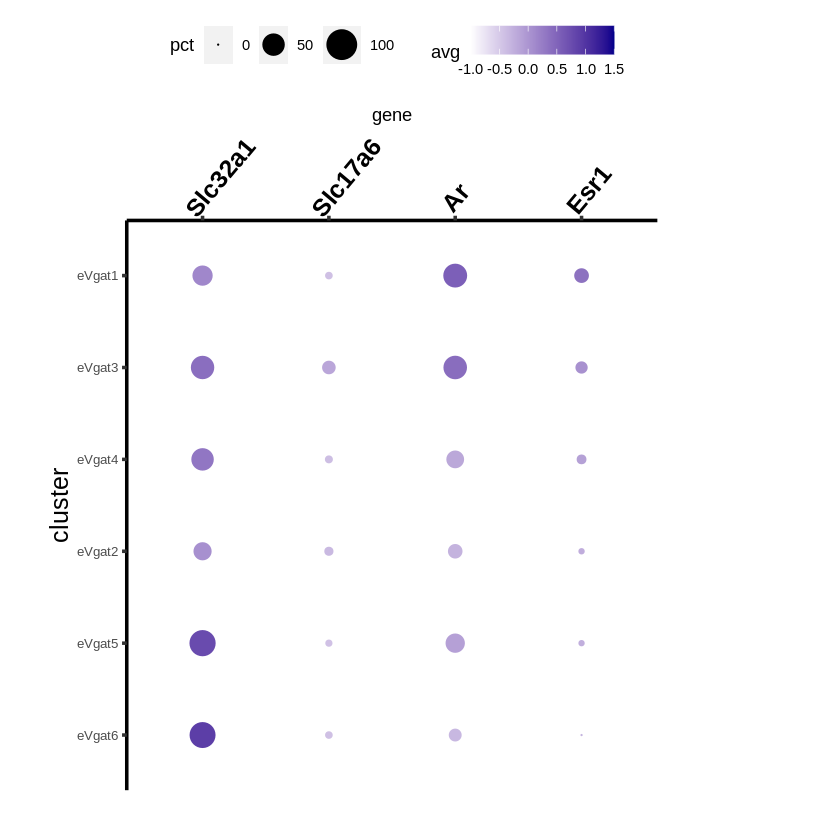

In [40]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_y_discrete(limits = (levels(Cell_number$cluster)))+scale_x_discrete(limits =rev(levels(Cell_number$gene)),position = "top")+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1,1.5),breaks=seq(-1,1.5,0.5),oob=squish) +scale_size_continuous(range = c(0,8),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=15,angle = 50, hjust = 0.1,vjust=0.5,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),,legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 110,30, 30))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/disc_hormone_vgat.pdf",height=7, width=3.9 , paper = "letter")

In [181]:
Cell_type<-rev(c("eVgat1","eVgat2","eVgat3","eVgat4","eVgat5","eVgat6","eVgat7","eVgat8","eVgat9","eVgat10","eVgat11","eVgat12"))
gene_list<-c("Slc32a1","Ar","Esr1","Dlx1")

In [182]:
#initialize empty data frame
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(Cell_type)){
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode",sep=""))))

Cell_number_t<- data.frame("type" =c(rep(Cell_type[i],L)))
#used normalized uncorrected data
for (p in 1:length(gene_list)){
Cell_number_t[gene_list[p]]<-as.vector(Esr1KOM@assays$RNA@data[gene_list[p],eval(parse(text = paste(Cell_type[i],"_barcode",sep="")))])
}
Cell_number<-rbind(Cell_number_t,Cell_number)}

as.factor(Cell_number$type)

[1] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [10] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [19] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [28] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [37] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [46] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [55] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [64] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [73] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [82] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
  [91] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [100] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [109] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [118] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [127] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [136] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [145] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [154] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [163] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [172] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [181] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [190] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [199] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [208] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [217] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [226] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [235] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [244] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [253] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [262] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [271] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [280] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [289] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [298] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [307] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [316] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [325] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [334] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [343] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [352] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [361] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [370] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [379] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [388] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [397] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [406] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [415] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [424] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [433] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [442] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1 
 [451] eVgat1  eVgat1  eVgat1  eVgat1  eVgat1  eVgat1

In [183]:
colors<-rep("dodgerblue4",12)

In [184]:
for (k in 1:length(gene_list))
    {
if (k==length(gene_list)){assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k],fill="type"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
        ,axis.text.y=element_blank(), axis.ticks.y=element_blank(),axis.text.x=element_text(size=12,face="bold",color="black",angle = 90, hjust =0,margin = margin(t = 2, r =0, b = 0, l =0)),axis.title.y=element_text(size=12,angle=0,face="bold",vjust=0.5,margin = margin(t = 5, r = 10, b = 0, l = 10)), axis.title=element_text(size=6,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0, 0, 0), "cm")))}
else{
    assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k],fill="type"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(), axis.ticks.x=element_blank(),axis.text.y=element_blank(), axis.ticks.y=element_blank(),axis.title.y=element_text(size=12,angle=0,face="bold",vjust=0.5,margin = margin(t = 5, r = 10, b = 0, l = 10)), axis.title=element_text(size=12,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0, 0, 0), "cm")))}

}

In [185]:
library(grid)

In [186]:
#for Slc32a1,gene_list<-c("Slc32a1","Slc17a6","Dlx1","Ar","Esr1","Pgr","Moxd1")
merge<-list()
for (i in length(gene_list):1){   
       if (length(merge)==0){
        merge<-ggplotGrob(eval(parse(text=paste("P",i,sep = ""))))}else{merge<-rbind(ggplotGrob(eval(parse(text=paste("P",i,sep = "")))),merge,size = "last")}}

#all gene
pdf(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOM/Neuron/stackplotviolin_all_clusters_hormone",".pdf",sep=""),height=3,width=18, paper = "letter")
grid.newpage()
grid.draw(merge)
dev.off()

png 
  2

start from here

In [18]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated@meta.data$celltype<-Idents(MPOA.integrated)

In [19]:
Esr1KOF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/Esr1KOF.rds")
new.ident <- c("Mix1","eVgat1","eVgat2","eVgat3","eVglu1","eVglu2","Mix2","eVgat4","eVgat5","eVglu3","Mix3","eVglu4","eVglu5","eVgat6","eVglu6","eVglu7")
names(x = new.ident) <- levels(x =Esr1KOF)
Esr1KOF<- RenameIdents(object =Esr1KOF, new.ident)

In [20]:
Esr1KOF@meta.data$celltype<-Idents(Esr1KOF)
Celltype<-c("eVgat1","eVgat2","eVgat3","eVgat4","eVgat5","eVgat6","eVglu1","eVglu2","eVglu3","eVglu4","eVglu5","eVglu6","eVglu7","eMix1")
Esr1KOF<-subset(Esr1KOF,cells=rownames(Esr1KOF@meta.data)[Esr1KOF@meta.data$celltype %in% Celltype])
Esr1KOF@meta.data$celltype<-factor(Esr1KOF@meta.data$celltype,levels=Celltype)
Idents(Esr1KOF)<-factor(Idents(Esr1KOF),levels=Celltype)

# Correlation KO and scRNAseq


In [131]:
MPOA_type<-c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
Esr1KOM_type<-rev(c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Vglu2","Vglu3","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Mix2","Vgat10","Vglu4","Vgat11","Vglu5","Vgat12","Vglu6","Ambiguous"))

In [20]:
#for extfig7 remove 6 17 1 3 20
MPOA_type<-c("Vgat13","Vgat16","Vgat4","Vgat10","Vgat8","Vgat2","Vgat15","Vgat18","Vgat12","Vgat7","Vgat11","Vgat9","Vgat14","Vgat5","Vgat19")
#MPOA_type<-c("Vgat13","Vgat16","Vgat4","Vgat10","Vgat8","Vgat2","Vgat15","Vgat18","Vgat12","Vgat7","Vgat11","Vgat9","Vgat14","Vgat5","Vgat19","Vgat6","Vgat17","Vgat1","Vgat3","Vgat20")
Esr1KOF_type<-rev(c("eVgat1","eVgat3","eVgat4","eVgat2","eVgat5","eVgat6"))

In [59]:
MPOA_type<-c("Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu12")
Esr1KOF_type<-rev(c("eVglu1","eVglu2","eVglu3","eVglu4","eVglu5","eVglu6"))

In [21]:
corr<- data.frame(matrix(NA, ncol=length(MPOA_type),nrow=length(Esr1KOF_type)))
rownames(corr)<-factor(Esr1KOF_type,levels=Esr1KOF_type)
colnames(corr)<-factor(MPOA_type,levels=MPOA_type)

In [22]:
p_value<- data.frame(matrix(NA, ncol=length(MPOA_type),nrow=length(Esr1KOF_type)))
rownames(p_value)<-factor(Esr1KOF_type,levels=Esr1KOF_type)
colnames(p_value)<-factor(MPOA_type,levels=MPOA_type)

In [23]:
genes<-intersect(rownames(Esr1KOF@ reductions$ pca@ feature.loadings),rownames(MPOA.integrated@assays$RNA@data))
MPOA_exp<-MPOA.integrated@assays$RNA@data[genes,]
Esr1KOF_exp<- Esr1KOF@assays$RNA@data[genes,]

In [24]:
length(genes)

[1] 1999

In [25]:
MPOA_exp<-t(scale(t(as.matrix(MPOA_exp))))
Esr1KOF_exp<-t(scale(t(as.matrix(Esr1KOF_exp))))

In [26]:
for (i in 1:length(MPOA_type)){
    for (j in 1:length(Esr1KOF_type)){
        test1<-Esr1KOF_exp[,eval(parse(text = paste(Esr1KOF_type[j],"_barcode",sep="")))]
rownames(test1) <- c()
test1<-rowMeans(test1)
include1<-is.na(test1)
test2<-MPOA_exp[,eval(parse(text = paste(MPOA_type[i],"_barcode",sep="")))]
rownames(test2) <- c()
test2<-rowMeans(test2)
include2<-is.na(test2)
include<-(include1+include2)==0
test1<-test1[include]
test2<-test2[include]

    corr[j,i]<-cor(test1,test2)
}}

In [27]:
for (i in 1:length(MPOA_type)){
    for (j in 1:length(Esr1KOF_type)){
          test1<-Esr1KOF_exp[,eval(parse(text = paste(Esr1KOF_type[j],"_barcode",sep="")))]
rownames(test1) <- c()
test1<-rowMeans(test1)
include1<-is.na(test1)
test2<-MPOA_exp[,eval(parse(text = paste(MPOA_type[i],"_barcode",sep="")))]
rownames(test2) <- c()
test2<-rowMeans(test2)
include2<-is.na(test2)
include<-(include1+include2)==0
test1<-test1[include]
test2<-test2[include]
   p_value[j,i]<-cor.test(test1,test2)[[3]]}}

In [28]:
library("reshape2")

In [29]:
test.m <- melt(as.matrix(corr))

In [30]:
library(scales)

In [31]:
test.p <- melt(as.matrix(p_value))

In [32]:
for(i in 1:dim(test.m)[1]){
    if (test.p$value[i]>0.05){
        test.m$value[i]<-0
    }else{
        test.m$value[i]<-test.m$value[i]
    }
}

In [34]:
p <- ggplot(test.m, aes(Var2, Var1)) + geom_tile(aes(fill =value),
     colour = "white")+ scale_fill_continuous(limits=c(0.3,0.8), breaks=seq(0.0,0.8,by=0.2),low = "white",high = "darkred", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("Esr1KOM")+xlab("scRNAseq")+theme(axis.text.y=element_text(size=15,colour = "black",face="bold"),axis.text.x=element_text(size=14,,angle = 50, hjust =1,colour = "black",face="bold"),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 1),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/correlation0.3.pdf",height=4.5, width=10 , paper = "letter")

# reference based projection

In [21]:
#for extfig7 remove 6 17 1 3 20
MPOA_type<-c("Vgat13","Vgat16","Vgat4","Vgat10","Vgat8","Vgat2","Vgat15","Vgat18","Vgat12","Vgat7","Vgat11","Vgat9","Vgat14","Vgat5","Vgat19")
Esr1KOF_type<-rev(c("eVgat1","eVgat3","eVgat4","eVgat2","eVgat5","eVgat6"))

In [22]:
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(MPOA.integrated@meta.data)[MPOA.integrated@meta.data$celltype %in% MPOA_type])
Esr1KOF<-subset(Esr1KOF,cells=rownames(Esr1KOF@meta.data)[Esr1KOF@meta.data$celltype %in% Esr1KOF_type])

In [23]:
POA.list<-objects() #maybe better using POA.list<-vector(mode = "list")
POA.list$MPOA.integrated<-MPOA.integrated
POA.list$Esr1KOF<-Esr1KOF
reference.list <- POA.list[c("MPOA.integrated","Esr1KOF")]

Warning message in POA.list$MPOA.integrated <- MPOA.integrated:
“Coercing LHS to a list”


In [24]:
genes<-intersect(rownames(Esr1KOF@ reductions$ pca@ feature.loadings),rownames(MPOA.integrated@assays$RNA@data))

In [44]:
POA.anchors <- FindTransferAnchors(reference = MPOA.integrated, query = Esr1KOF, reduction = "cca", dims = 1:10,features=genes)

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4924 anchors

Filtering anchors

	Retained 4060 anchors



In [45]:
predictions <- TransferData(anchorset = POA.anchors, refdata = MPOA.integrated$celltype, weight.reduction="cca",  dims = 1:10)
Esr1KOF <- AddMetaData(Esr1KOF, metadata = predictions)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [46]:
Esr1KOF@meta.data$celltype<-factor(Esr1KOF@meta.data$celltype,levels=Esr1KOF_type)
Esr1KOF@meta.data$predicted.id<-factor(Esr1KOF@meta.data$predicted.id,levels=MPOA_type)

In [59]:
#used
meta <- Esr1KOF@meta.data %>% select(celltype, predicted.id) %>% group_by(celltype, .drop = FALSE) %>% count(celltype, predicted.id)
adjusted<-numeric()
for(i in 1:dim(meta)[1]){
    adjusted[i]<-100*meta$n[i]/sum(subset(meta,predicted.id==meta$predicted.id[i])$n)
}
meta$adjusted<-adjusted

In [60]:
meta<-meta[meta$predicted.id %in% c("Vgat2","Vgat4","Vgat16"),]

In [61]:
meta$celltype<-factor(meta$celltype,levels=Esr1KOF_type)
meta$predicted.id<-factor(meta$predicted.id,levels=c("Vgat2","Vgat4","Vgat16"))

In [62]:
unique(meta$celltype)

[1] eVgat6 eVgat5 eVgat2 eVgat4 eVgat3 eVgat1
Levels: eVgat6 eVgat5 eVgat2 eVgat4 eVgat3 eVgat1

In [67]:
colors=c(c("eVgat1"="indianred","eVgat3"="darkblue","eVgat4"="lightblue","eVgat4"="lightgray","eVgat2"="darkgray","eVgat5"="lightsalmon","eVgat6"="gray"))

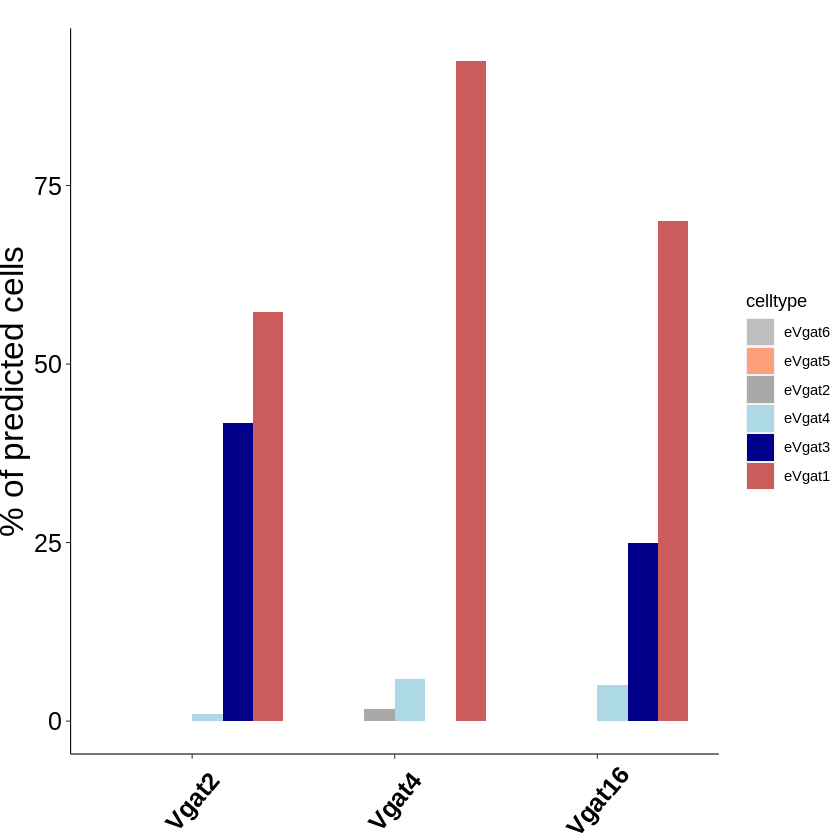

In [68]:
#% of scRNAseq Vgat Esr1 cell types predicted in KO data
ggplot(meta,aes(x=predicted.id,y=adjusted,fill=celltype,group=celltype))+geom_bar(position="dodge",stat = "identity")+ylab("% of predicted cells")+
scale_fill_manual(values=colors)+
theme(axis.title.y=element_text(size=20,color="black"),axis.title.x=element_blank(),axis.text.y=element_text(size=15,color="black"),axis.text.x=element_text(size=15,angle = 50, hjust = 0.5,vjust=0.5,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=0.3),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size =0.3), plot.margin = unit(c(0.6, 0,0, 0), "cm"))
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1KOF_number_of_predicted_celltype_rev#3_com#4.pdf",height=3, width=10 , paper = "letter")

# DEG analysis

In [2]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}
Esr1KOF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/Esr1KOF.rds")
new.ident <- c("Mix1","eVgat1","eVgat2","eVgat3","eVglu1","eVglu2","Mix2","eVgat4","eVgat5","eVglu3","Mix3","eVglu4","eVglu5","eVgat6","eVglu6","eVglu7")
names(x = new.ident) <- levels(x =Esr1KOF)
Esr1KOF<- RenameIdents(object =Esr1KOF, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOF@assays$RNA@data[,which(Idents(object=Esr1KOF) %in% new.ident[i])]))}

In [3]:
DefaultAssay(Esr1KOF) <- "RNA"
celltype<-c(eVgat3_barcode,eVgat1_barcode) #def of Vgat Esr1 in KOF data
KO<-subset(Esr1KOF,cells=celltype)

In [4]:
#VgatEsr1
DefaultAssay(MPOA.integrated) <- "RNA"
temp<-c(Vgat4_barcode,Vgat2_barcode,Vgat16_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AF")))
Intact<-subset(MPOA.integrated,cells=celltype)

In [6]:
#Vgatlow
DefaultAssay(MPOA.integrated) <- "RNA"
temp<-c(Vgat14_barcode,Vgat17_barcode,Vgat20_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AF")))
Intact<-subset(MPOA.integrated,cells=celltype)
DefaultAssay(Esr1KOF) <- "RNA"
celltype<-c(eVgat5_barcode) # not very clearn
KO<-subset(Esr1KOF,cells=celltype)

In [ ]:
DefaultAssay(MPOA.integrated) <- "RNA"
temp<-c(Vglu1_barcode,Vgat4_barcode,Vgat6_barcode,Vgat16_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
Intact<-subset(MPOA.integrated,cells=celltype)

In [5]:
Merge<-merge(x = KO, y = Intact,  merge.data = TRUE)
DefaultAssay(Merge) <- "RNA"

In [7]:
celltype.stim<-vector()
for (i in 1:dim(Merge@meta.data)[1]){
    if(Merge@meta.data$stim[i]=="AF"){celltype.stim[i]<-"AF"}
    else if(Merge@meta.data$stim[i]=="Esr1KOF"){celltype.stim[i]<-"Esr1KOF"}
       }

Merge@meta.data$celltype.stim<-celltype.stim

In [8]:
Merge[["celltype"]] <- Idents(object = Merge)
Idents(Merge = Merge) <- Merge@meta.data$celltype.stim


In [8]:
one.markers <- FindMarkers(Merge, ident.1 = "AF", ident.2 ="Esr1KOF", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]

In [10]:
one.markers <- FindMarkers(Merge, ident.1 = "AF", ident.2 ="Esr1KOF", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(sort_marker,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/All_gene.xlsx"))

In [57]:
one.markers <- FindMarkers(Merge, ident.1 = "AF", ident.2 ="Esr1KOF", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1n.xlsx"))

In [58]:
write.xlsx2(subset(sort_marker,avg_logFC>0.1 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC>0.1 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx"))

In [10]:
#vgat low
one.markers <- FindMarkers(Merge, ident.1 = "AF", ident.2 ="Esr1KOF", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/low/gene_adjust_0.1_2416vs5.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/low/gene_adjust_0.1n_2416vs5.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC>0.1 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/low/gene_adjust_0.1_0.1_2416vs5.xlsx"))

# heatmap

In [18]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}
#temp<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)
temp<-c(Vgat14_barcode,Vgat17_barcode,Vgat20_barcode) # hormone low
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AF" | stim=="P35F"| stim=="P23F"|stim=="OVX")))
MPOA.integrated<-subset(MPOA.integrated,cells=celltype)
Esr1KOF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/Esr1KOF.rds")
new.ident <- c("Mix1","eVgat1","eVgat2","eVgat3","eVglu1","eVglu2","Mix2","eVgat4","eVgat5","eVglu3","Mix3","eVglu4","eVglu5","eVgat6","eVglu6","eVglu7")
names(x = new.ident) <- levels(x =Esr1KOF)
Esr1KOF<- RenameIdents(object =Esr1KOF, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOF@assays$RNA@data[,which(Idents(object=Esr1KOF) %in% new.ident[i])]))}

#201111 3 4
#celltype<-c(eVgat1_barcode,eVgat3_barcode)
celltype<-c(eVgat5_barcode)  # hormone low
KO<-subset(Esr1KOF,cells=celltype)
MPOA.integrated<-merge(x=MPOA.integrated,y=KO)

In [19]:
Cell_type<-c("Esr1KOF","OVX","AF")
#Cell_type<-c("Esr1KOF","P23F","OVX","P35F","AF")
Cell_type<-factor(Cell_type,levels=Cell_type)

In [20]:
temp1<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)
temp3<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35F_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)
temp2<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/gene_adjust_0.1_0.1.xlsx",sheetIndex=1)
temp1<-temp1[,1]
temp2<-temp2[,1]
temp3<-temp3[,1]
#both<-intersect(temp1,intersect(temp2,temp3))
both<-intersect(temp1,temp2)
gene_list<-both

In [21]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
#Cell_number_t$pct[p]<-100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$zscore[p]<-(mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],]))/sd(MPOA.integrated@assays$RNA@data[gene_list[i],])
Cell_number_t$FC[p]<-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim!=Cell_type[p]))])
Cell_number_t$percent[p]<- 100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))]>0)/length(MPOA.integrated@assays$RNA@data[gene_list[i],rownames(subset(MPOA.integrated@meta.data,stim==Cell_type[p]))])
}
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [10] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [19] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [28] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [37] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [46] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [55] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [64] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [73] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [82] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
 [91] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[100] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[109] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[118] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[127] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[136] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[145] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[154] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[163] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[172] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[181] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[190] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[199] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[208] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[217] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[226] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[235] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[244] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[253] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[262] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[271] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[280] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[289] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[298] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[307] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[316] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[325] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[334] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[343] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[352] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[361] Esr1KOF OVX     AF      Esr1KOF OVX     AF      Esr1KOF OVX     AF     
[370] Esr1KOF OVX     AF     
Levels: Esr1KOF OVX AF

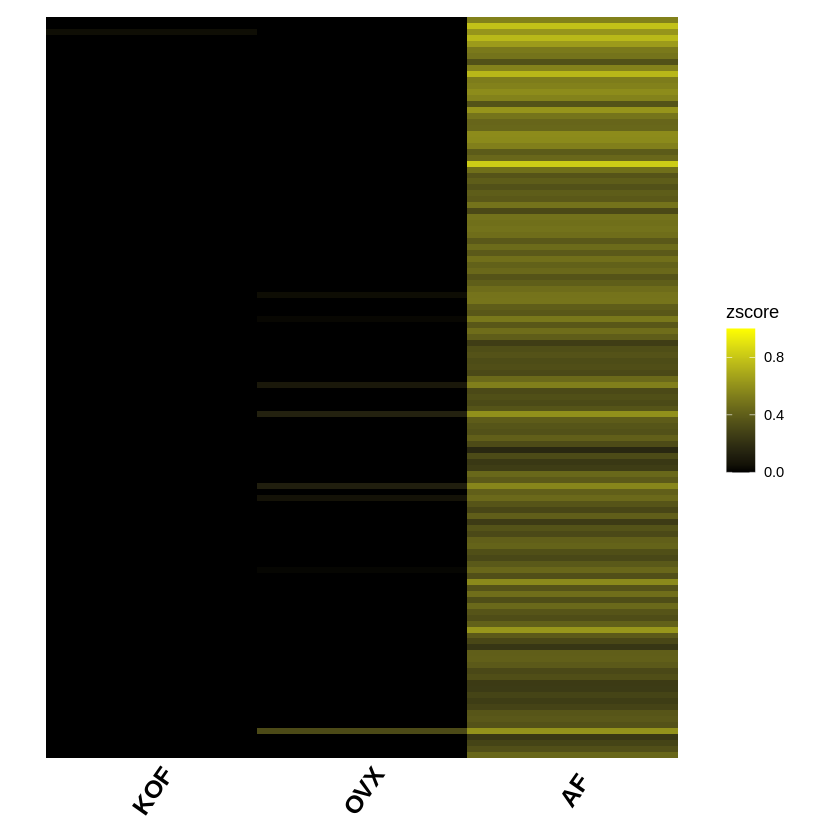

In [12]:
low<- -0.0
high<-1
p<-ggplot(Cell_number, aes(cluster, gene))+ 
  geom_tile(aes(fill =zscore))+ scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.4),low = "black",high = "yellow", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("group")+xlab("genes")+theme(axis.text.x=element_text(size=15,colour = "black",angle = 55, vjust =0.6,face="bold"),axis.text.y=element_text(size=0,colour = "black"),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks.y = element_blank(),axis.ticks.x = element_blank(), plot.margin = margin(10, 28, 10, 10))+ scale_x_discrete(labels=c("Esr1KOF" = "KOF", "OVX" = "OVX",
                              "AF" = "AF"))
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/heatmap_male_common_5groups_",low,"_",high,"_mini.pdf",sep=""),width=2.5,height=5)

In [10]:
both

[1] "Fgfr1"         "Pdzrn4"        "Socs2"         "Pgr"          
  [5] "Tmem35a"       "Zbtb20"        "Hpcal1"        "Nts"          
  [9] "Sccpdh"        "Nrip1"         "Olfm3"         "Ptp4a1"       
 [13] "Tmcc3"         "Tmem158"       "Sv2c"          "Maf"          
 [17] "Pcp4"          "Scg2"          "Enah"          "Nop56"        
 [21] "Parm1"         "Pak3"          "Kcns2"         "Sez6l"        
 [25] "Meg3"          "Maged1"        "Id4"           "Apoc3"        
 [29] "Kcnk2"         "Hs3st5"        "Rap1gap"       "Eif1b"        
 [33] "Irs4"          "Prkce"         "Chpt1"         "Brinp2"       
 [37] "Neo1"          "Spock3"        "Plcb4"         "Itm2c"        
 [41] "Hsph1"         "Fndc9"         "Atp1b3"        "Ctnna2"       
 [45] "Rbbp7"         "Pcdh7"         "Ogt"           "Chml"         
 [49] "Ptpn5"         "Tead1"         "Nexmif"        "Nrp1"         
 [53] "Neto2"         "Stk19"         "Kl"            "Prrt1"        
 [57] "Nos1"          "Htr1b"         "Drp2"          "Plekhb1"      
 [61] "Arhgef9"       "Fstl5"         "Gfra1"         "Hspa5"        
 [65] "Dgkb"          "Mmd"           "Lrp1b"         "Chst11"       
 [69] "H2-Q2"         "Fam46a"        "Scml4"         "Ets2"         
 [73] "Gabre"         "Idnk"          "Mast4"         "Irs2"         
 [77] "Rps6ka3"       "Map2k1"        "mt-Nd3"        "Nrsn1"        
 [81] "Elavl4"        "Kpnb1"         "Rbms3"         "Nos1ap"       
 [85] "Grik1"         "Syne2"         "Trp53inp1"     "Gm16485"      
 [89] "Pard3"         "Dlgap1"        "Mgat5"         "Slitrk6"      
 [93] "Phyhipl"       "Ormdl1"        "Tnxb"          "Dgkd"         
 [97] "Nxn"           "Lpp"           "Rasd1"         "Nectin3"      
[101] "Clmp"          "Pitpnm3"       "A730046J19Rik" "Naaa"         
[105] "Znrf2"         "Nfkbia"        "Opn3"          "St3gal1"      
[109] "Ikzf2"         "Rps27l"        "Fsd1l"         "Arhgap24"     
[113] "Rps6ka6"       "Ppa2"          "Sema3a"        "Ddc"          
[117] "Gadd45a"       "Cdr2"          "Fhad1"         "mt-Co2"       
[121] "Ggct"          "Shisa2"        "Kit"           "Creb3l1"

In [22]:
genes<-c('Nrip1','Pdzrn4','Irs4','Socs2','Ctnna2','Lrp1b',"Sytl4",'Gabre',"Lamp5","Pgr","Nrip1",'Grik1',"Acvr1c","Apoc3","Greb1","Tead1","Napb","Apoe",'Arhgap24','Creb3l1','Sema3a')

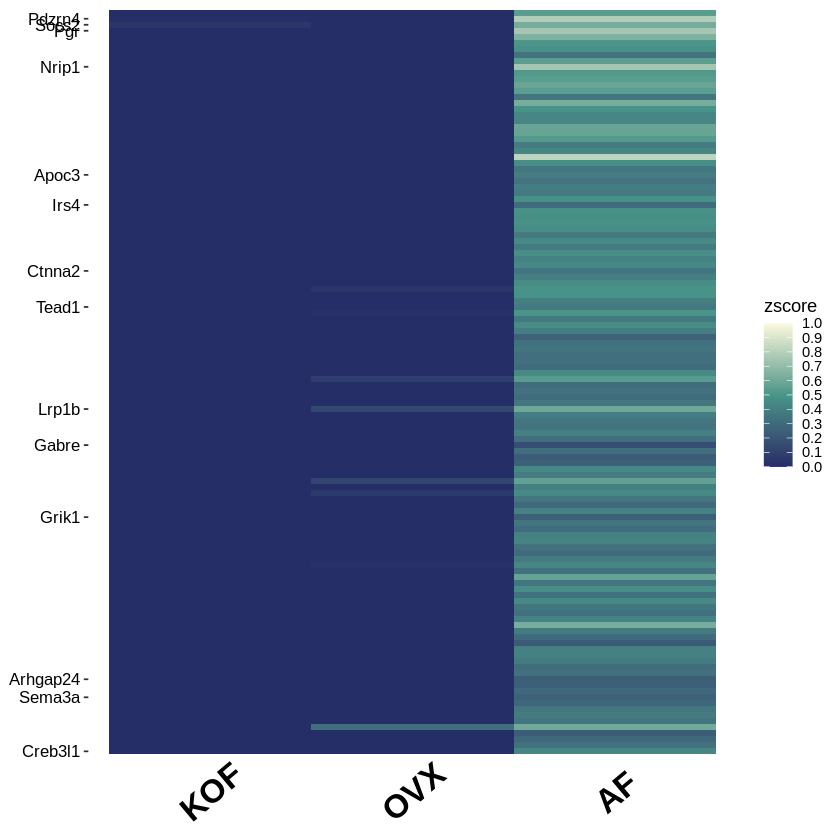

In [17]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- -0.0
high<-1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =zscore,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("group")+xlab("genes")+theme(axis.text.x=element_text(size=20,colour = "black",angle = 40, vjust =0.6,face="bold"),axis.text.y=element_text(size=10,colour = "black"),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),,axis.ticks.x = element_blank())+ scale_x_discrete(labels=c("Esr1KOF" = "KOF", "OVX" = "OVX",
                              "AF" = "AF"))
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/heatmap_female_common_3groups_",low,"_",high,"_mini_color_adjusted_Fig4.pdf",sep=""),width=2.5,height=5,paper="letter")

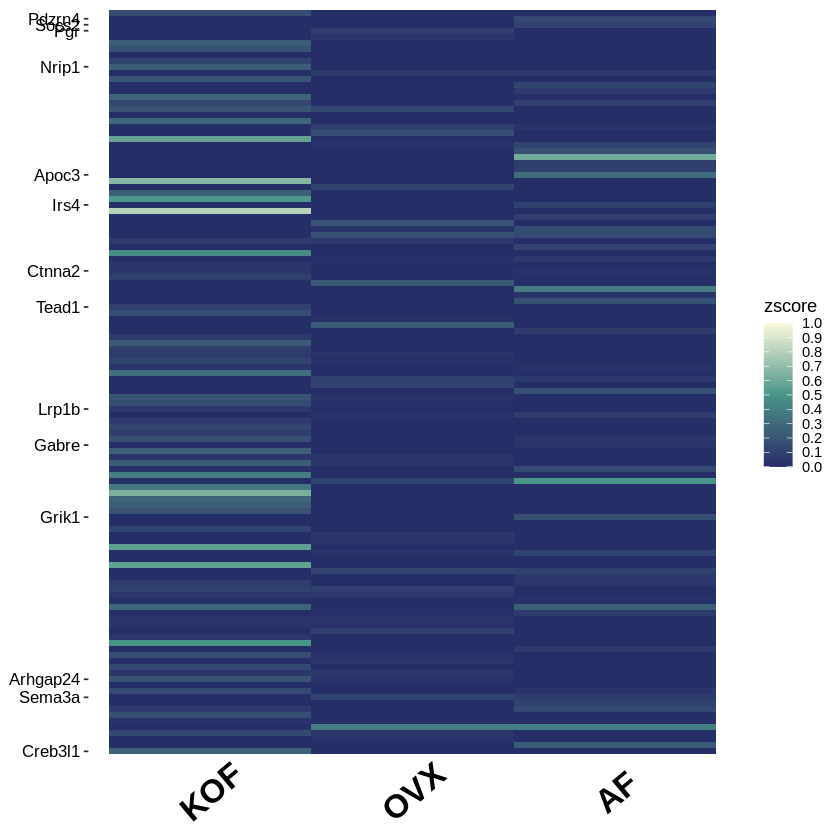

In [24]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- -0.0
high<-1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =zscore,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("group")+xlab("genes")+theme(axis.text.x=element_text(size=20,colour = "black",angle = 40, vjust =0.6,face="bold"),axis.text.y=element_text(size=10,colour = "black"),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),,axis.ticks.x = element_blank())+ scale_x_discrete(labels=c("Esr1KOF" = "KOF", "OVX" = "OVX",
                              "AF" = "AF"))
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/DEG/heatmap_female_common_3groups_hormonelow",low,"_",high,"_mini_adjust_color.pdf",sep=""),width=2.5,height=5,paper="letter")